Projet Python data visualisation

Le contexte 
Vous êtes data analyste pour un client (fictif ou non) et vous devez présenter une analyse de données complètes, de la formulation d’une problématique à l'élaboration de graphiques pertinents ainsi qu'une mise en oeuvre respectant les conditions ci-dessous. 

Consignes 

Votre analyse sous forme de Jupyter Notebook devra contenir:

    Au moins 1 diagramme avec données continues, type nuage de point ou histogramme
    Au moins 1 diagramme avec des données discrètes
    Au moins 2 graphiques avec des données catégoriques
    1 boîte à moustaches avec filtrage des données aberrantes sur le dataset (si il y en a)
    1 heat map avec matrice de corrélation (si pertinent)
    Des commentaires clairs et pertinents pour chaque graphiques 

4 compétences évaluées 

    Compréhension du sujet 
    Structure de l’exposé 
    Présentation orale et fluidité 
    Présentation écrite (fluidité du notebook)

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline 

In [2]:
#import datasets
cadf = pd.read_csv("./data/Cybersecurity_attacks.csv")
tcp_ports = pd.read_csv("./data/TCP-ports.csv")
df = pd.merge(cadf,
        tcp_ports[['Port','Service', 'Description']],
        how="left",
        left_on="Destination Port",
        right_on="Port")
df.head(50)

,Attack category,Attack subcategory,Protocol,Source IP,Source Port,Destination IP,Destination Port,Attack Name,Attack Reference,.,Time,Port,Service,Description
0,Reconnaissance,HTTP,tcp,175.45.176.0,13284,149.171.126.16,80,Domino Web Server Database Access: /doladmin.n...,-,.,1421927414-1421927416,80.0,http,HTTP
1,Exploits,Unix 'r' Service,udp,175.45.176.3,21223,149.171.126.18,32780,Solaris rwalld Format String Vulnerability (ht...,CVE 2002-0573 (http://cve.mitre.org/cgi-bin/cv...,.,1421927415-1421927415,NaN,NaN,NaN
2,Exploits,Browser,tcp,175.45.176.2,23357,149.171.126.16,80,Windows Metafile (WMF) SetAbortProc() Code Exe...,CVE 2005-4560 (http://cve.mitre.org/cgi-bin/cv...,.,1421927416-1421927416,80.0,http,HTTP
3,Exploits,Miscellaneous Batch,tcp,175.45.176.2,13792,149.171.126.16,5555,HP Data Protector Backup (https://strikecenter...,CVE 2011-1729 (http://cve.mitre.org/cgi-bin/cv...,.,1421927417-1421927417,5555.0,personal-agent,Personal Agent
4,Exploits,Cisco IOS,tcp,175.45.176.2,26939,149.171.126.10,80,Cisco IOS HTTP Authentication Bypass Level 64 ...,CVE 2001-0537 (http://cve.mitre.org/cgi-bin/cv...,.,1421927418-1421927418,80.0,http,HTTP
5,DoS,Miscellaneous,tcp,175.45.176.0,39500,149.171.126.15,80,Cisco DCP2100 SADownStartingFrequency Denial o...,http://www.exploit-db.com/exploits/21523/ (htt...,.,1421927419-1421927419,80.0,http,HTTP
6,DoS,Miscellaneous,tcp,175.45.176.0,23910,149.171.126.15,80,Cisco DCP2100 SADownStartingFrequency Denial o...,http://www.exploit-db.com/exploits/21523/ (htt...,.,1421927419-1421927422,80.0,http,HTTP
7,Generic,IXIA,tcp,175.45.176.0,29309,149.171.126.14,3000,Alt-N_MDaemon_WorldClient_Service_Memory_Corru...,CVE 2008-2631 (http://cve.mitre.org/cgi-bin/cv...,.,1421927420-1421927420,3000.0,remoteware-cl,RemoteWare Client
8,Exploits,Browser,tcp,175.45.176.0,61089,149.171.126.18,80,Microsoft Internet Explorer Frameset Memory Co...,CVE 2006-3637 (http://cve.mitre.org/cgi-bin/cv...,.,1421927421-1421927421,80.0,http,HTTP
9,Exploits,Browser,tcp,175.45.176.0,4159,149.171.126.18,80,Microsoft Internet Explorer Frameset Memory Co...,CVE 2006-3637 (http://cve.mitre.org/cgi-bin/cv...,.,1421927421-1421927422,80.0,http,HTTP


## Nettoyer la dataset

In [3]:
#supprimer la colonne '.'
df = df.drop(['.',"Port"],axis=1)

In [4]:
#Je remarque que la colonne "Time" contient deux timestamp qui corresponds au début et la fin de l'attack
#Je vais donc creer 3 colonnes Start attack, End attack,duration of attack et convertir le timestamp to date

#expand=True pour ne pas avoir cette ValueError: Must have equal len keys and value when setting with an iterable
df[["Start attack","End attack"]] = df['Time'].str.split("-",expand=True)
df["Start attack"] = pd.to_datetime(df["Start attack"],unit="s")
df["End attack"] = pd.to_datetime(df["End attack"],unit="s")
df["Duration of attack"] = ((df["End attack"] - df["Start attack"]).dt.seconds).astype(int)
df.head()

,Attack category,Attack subcategory,Protocol,Source IP,Source Port,Destination IP,Destination Port,Attack Name,Attack Reference,Time,Service,Description,Start attack,End attack,Duration of attack
0,Reconnaissance,HTTP,tcp,175.45.176.0,13284,149.171.126.16,80,Domino Web Server Database Access: /doladmin.n...,-,1421927414-1421927416,http,HTTP,2015-01-22 11:50:14,2015-01-22 11:50:16,2
1,Exploits,Unix 'r' Service,udp,175.45.176.3,21223,149.171.126.18,32780,Solaris rwalld Format String Vulnerability (ht...,CVE 2002-0573 (http://cve.mitre.org/cgi-bin/cv...,1421927415-1421927415,NaN,NaN,2015-01-22 11:50:15,2015-01-22 11:50:15,0
2,Exploits,Browser,tcp,175.45.176.2,23357,149.171.126.16,80,Windows Metafile (WMF) SetAbortProc() Code Exe...,CVE 2005-4560 (http://cve.mitre.org/cgi-bin/cv...,1421927416-1421927416,http,HTTP,2015-01-22 11:50:16,2015-01-22 11:50:16,0
3,Exploits,Miscellaneous Batch,tcp,175.45.176.2,13792,149.171.126.16,5555,HP Data Protector Backup (https://strikecenter...,CVE 2011-1729 (http://cve.mitre.org/cgi-bin/cv...,1421927417-1421927417,personal-agent,Personal Agent,2015-01-22 11:50:17,2015-01-22 11:50:17,0
4,Exploits,Cisco IOS,tcp,175.45.176.2,26939,149.171.126.10,80,Cisco IOS HTTP Authentication Bypass Level 64 ...,CVE 2001-0537 (http://cve.mitre.org/cgi-bin/cv...,1421927418-1421927418,http,HTTP,2015-01-22 11:50:18,2015-01-22 11:50:18,0


In [5]:
print(df["Duration of attack"].max()," secondes est le temps de la plus longue attaque ")
print(df["Duration of attack"].mean()," secondes est le temps moyen d'une attaque ")

60  secondes est le temps de la plus longue attaque 
2.3453724351377008  secondes est le temps moyen d'une attaque 


In [6]:
df = df.drop(['Time'],axis=1)

In [7]:
#Nombre de lignes et de colonne avant le trie des ports valident
df.shape

(178031, 14)

In [8]:
#Supprimer les données avec un ports invalide (0 > port < 65535)
valide_ports =(df["Source Port"] >0) & (df["Source Port"]<65535) & (df["Destination Port"]>0) & (df["Destination Port"]<65535)
df = df[valide_ports].reset_index(drop=True)
df.shape

(83601, 14)

In [9]:
df.head()

,Attack category,Attack subcategory,Protocol,Source IP,Source Port,Destination IP,Destination Port,Attack Name,Attack Reference,Service,Description,Start attack,End attack,Duration of attack
0,Reconnaissance,HTTP,tcp,175.45.176.0,13284,149.171.126.16,80,Domino Web Server Database Access: /doladmin.n...,-,http,HTTP,2015-01-22 11:50:14,2015-01-22 11:50:16,2
1,Exploits,Unix 'r' Service,udp,175.45.176.3,21223,149.171.126.18,32780,Solaris rwalld Format String Vulnerability (ht...,CVE 2002-0573 (http://cve.mitre.org/cgi-bin/cv...,NaN,NaN,2015-01-22 11:50:15,2015-01-22 11:50:15,0
2,Exploits,Browser,tcp,175.45.176.2,23357,149.171.126.16,80,Windows Metafile (WMF) SetAbortProc() Code Exe...,CVE 2005-4560 (http://cve.mitre.org/cgi-bin/cv...,http,HTTP,2015-01-22 11:50:16,2015-01-22 11:50:16,0
3,Exploits,Miscellaneous Batch,tcp,175.45.176.2,13792,149.171.126.16,5555,HP Data Protector Backup (https://strikecenter...,CVE 2011-1729 (http://cve.mitre.org/cgi-bin/cv...,personal-agent,Personal Agent,2015-01-22 11:50:17,2015-01-22 11:50:17,0
4,Exploits,Cisco IOS,tcp,175.45.176.2,26939,149.171.126.10,80,Cisco IOS HTTP Authentication Bypass Level 64 ...,CVE 2001-0537 (http://cve.mitre.org/cgi-bin/cv...,http,HTTP,2015-01-22 11:50:18,2015-01-22 11:50:18,0


In [10]:
df["Attack category"].unique()

array(['Reconnaissance', 'Exploits', 'DoS', 'Generic', 'Shellcode',
       ' Fuzzers', 'Worms', 'Backdoors', 'Analysis', ' Fuzzers ',
       ' Reconnaissance ', ' Shellcode ', 'Backdoor', 'Reconnaissance '],
      dtype=object)

In [11]:
df["Attack category"] = df["Attack category"].str.strip().replace("Backdoors","Backdoor");
df["Attack category"] = df["Attack category"].str.upper().str.strip();
df["Attack category"].unique()

array(['RECONNAISSANCE', 'EXPLOITS', 'DOS', 'GENERIC', 'SHELLCODE',
       'FUZZERS', 'WORMS', 'BACKDOOR', 'ANALYSIS'], dtype=object)

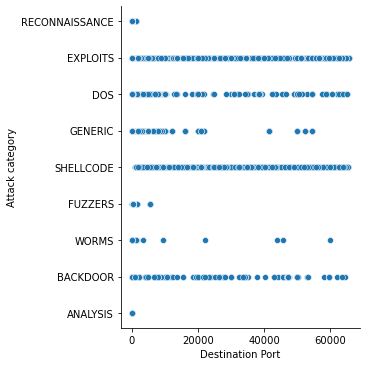

In [12]:
sns.relplot(x="Destination Port",y="Attack category",data=df)

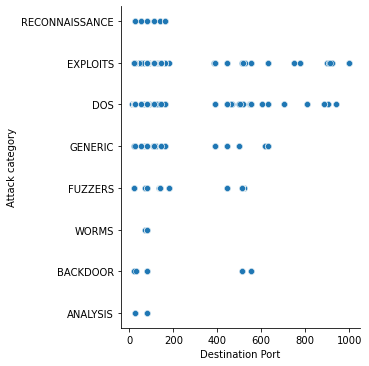

In [13]:
#afficher un nuage de point pour les Port <= 1000
filtred_port = df[df["Destination Port"] <= 1000]

sns.relplot(x="Destination Port",y="Attack category",data=filtred_port)

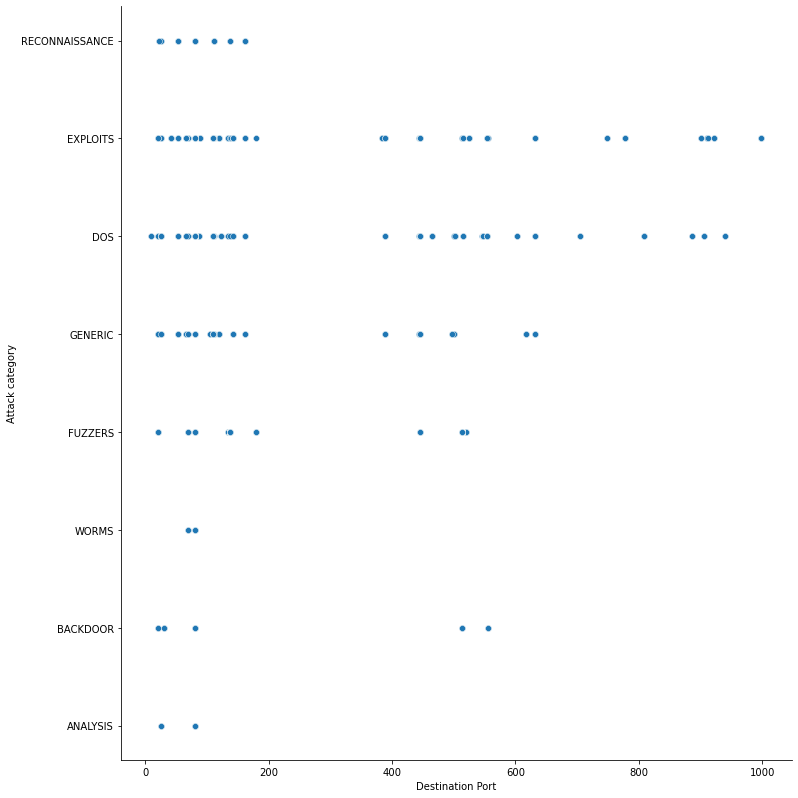

In [14]:
#agrandir la figure
sns.relplot(y="Attack category",
            x="Destination Port",
            data=filtred_port,
           height=11)

Ici on voit que les attaques avec des Exploits touche plus de port 

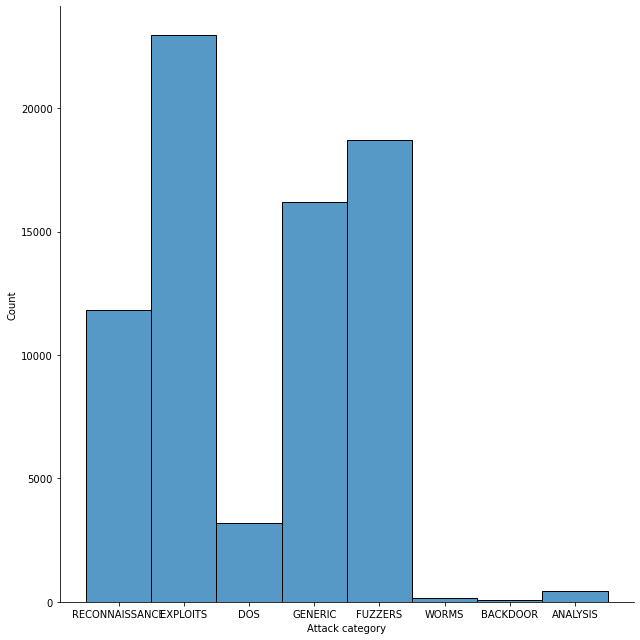

In [15]:
data = filtred_port['Attack category']
sns.displot(data, discrete=True,legend=True,height=9)
plt.show()

Dans ce graphique on remarque que la categorie d'attaque la plus utilisé est Exploits 

Text(0, 0.5, 'Number attack')

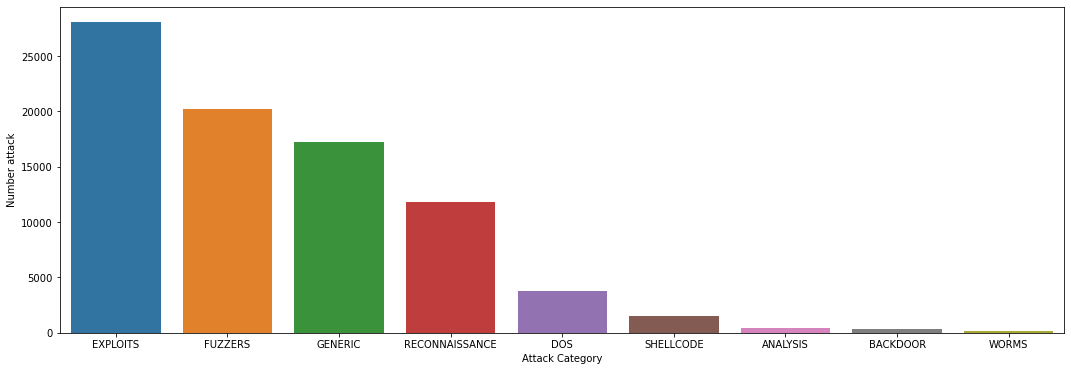

In [16]:
plt.figure(figsize=(18,6))
sns.barplot(x=df['Attack category'].value_counts().index,y=df['Attack category'].value_counts())
plt.xlabel('Attack Category')
plt.ylabel('Number attack')

In [17]:
print(df[pd.notnull(df["Attack Reference"])]["Attack category"].value_counts())

EXPLOITS          28063
GENERIC           16896
DOS                3704
FUZZERS            3562
RECONNAISSANCE     1972
SHELLCODE           764
BACKDOOR            303
WORMS               158
ANALYSIS             64
Name: Attack category, dtype: int64


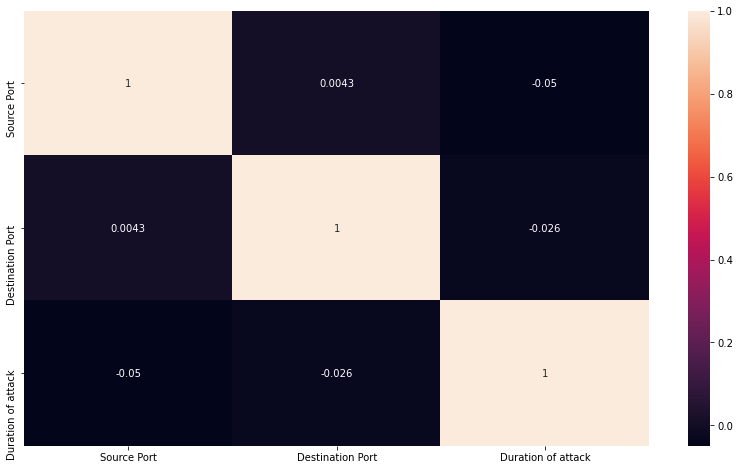

In [18]:
plt.figure(figsize=(14,8))
sns.heatmap(df.corr(),annot=True);

### 

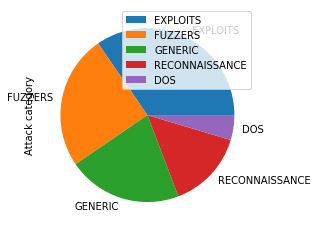

In [19]:
#afficher le top 5 des attques
top5=pd.DataFrame(df['Attack category'].value_counts())[:5]
top5.plot(kind='pie', subplots=True)
plt.show()

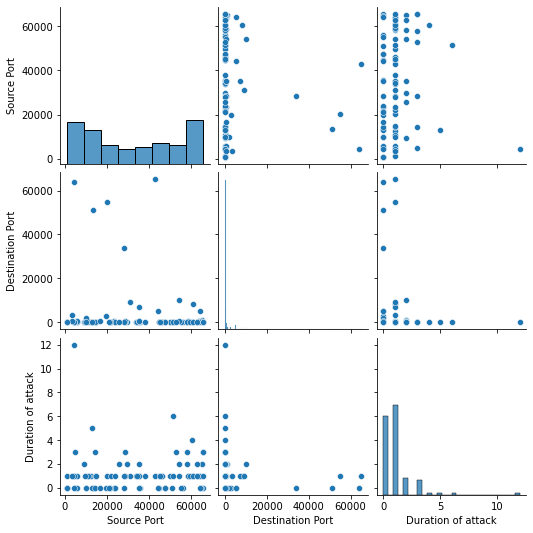

In [20]:
sns.pairplot(df.sample(100));